# 다중 분류(Multiclass Classification)
### 붓꽃의 품종을 분류하는 문제
---
- 데이터 셋: iris

### 필요한 라이브러리 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### 데이터 준비

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['species'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
df['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
X = df.drop(['species'], axis=1)
y = df['species']

- 데이터 분리: 학습 데이터, 테스트 데이터

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    stratify=y, 
                                                    random_state=1234)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


In [ ]:
y_train.value_counts()

2    40
1    40
0    40
Name: species, dtype: int64

- 표준화(Standardization)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
y_train = y_train.values

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(y_train)
y_train_oh[:5]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [ ]:
X_train_s.shape

(120, 4)

### 모델링(Modeling)

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(4,)), 
    layers.Dense(32, activation='relu'), 
    layers.Dense(3, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2,499
Trainable params: 2,499
Non-trainable params: 0
_________________________________________________________________


### 컴파일(Compile)

In [ ]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['acc']
)

### 학습(Training)

In [ ]:
EPOCHS = 200
BATCH_SIZE = 32

history = model.fit(X_train_s, y_train_oh, 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_split=0.2, 
                    verbose=1)

Epoch 1/200
3/3 [==============================] - 6s 717ms/step - loss: 1.0585 - acc: 0.5521 - val_loss: 0.9485 - val_acc: 0.6250
Epoch 2/200
3/3 [==============================] - 0s 56ms/step - loss: 1.0057 - acc: 0.5833 - val_loss: 0.8915 - val_acc: 0.7500
Epoch 3/200
3/3 [==============================] - 0s 98ms/step - loss: 0.9597 - acc: 0.6354 - val_loss: 0.8405 - val_acc: 0.7500
Epoch 4/200
3/3 [==============================] - 0s 163ms/step - loss: 0.9144 - acc: 0.6354 - val_loss: 0.7954 - val_acc: 0.7500
Epoch 5/200
3/3 [==============================] - 0s 76ms/step - loss: 0.8745 - acc: 0.6354 - val_loss: 0.7537 - val_acc: 0.7500
Epoch 6/200
3/3 [==============================] - 0s 238ms/step - loss: 0.8383 - acc: 0.6458 - val_loss: 0.7138 - val_acc: 0.7500
Epoch 7/200
3/3 [==============================] - 0s 52ms/step - loss: 0.8019 - acc: 0.7396 - val_loss: 0.6747 - val_acc: 0.7917
Epoch 8/200
3/3 [==============================] - 0s 74ms/step - loss: 0.7664 - acc: 0

- 학습 과정 시각화

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Accuracy')

    plt.legend()
    plt.show()

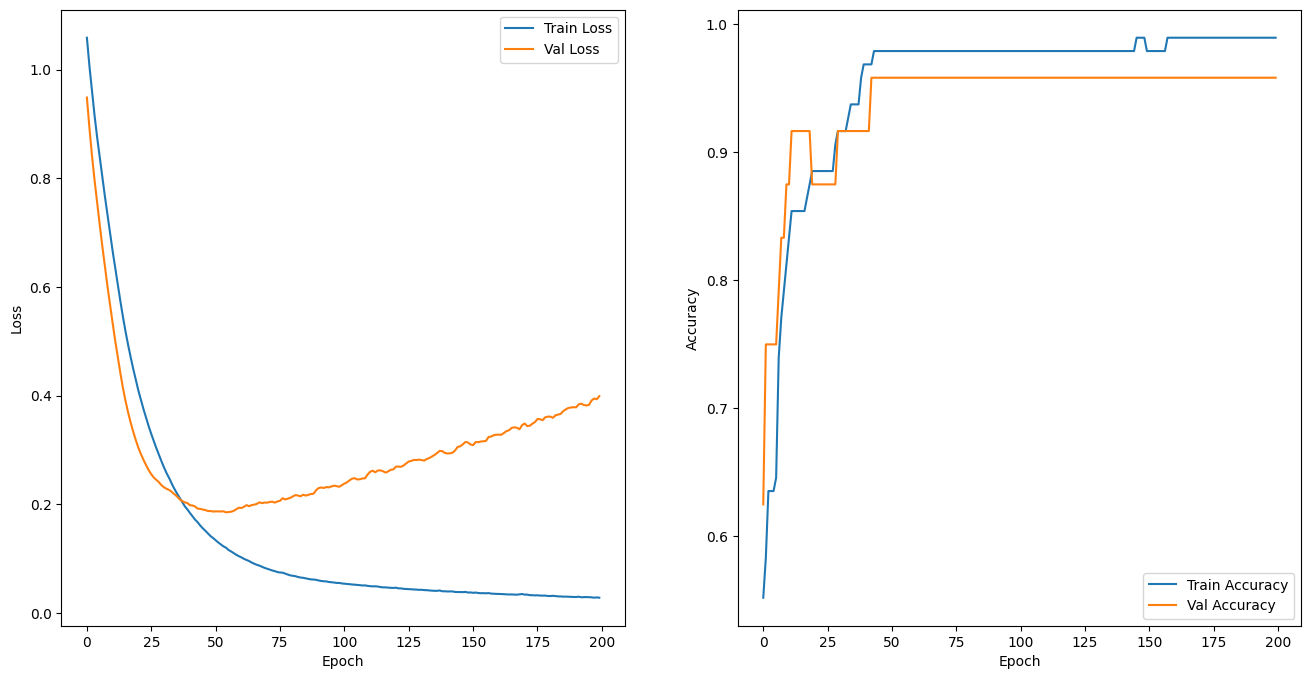

In [ ]:
plot_history(history)

### 평가(Evaluation)

In [ ]:
model.evaluate(X_train_s, y_train_oh)

4/4 [==============================] - 0s 4ms/step - loss: 0.1020 - acc: 0.9833


[0.10203426331281662, 0.9833333492279053]

In [ ]:
X_test_s = scaler.transform(X_test)
y_test_oh = to_categorical(y_test)

In [ ]:
model.evaluate(X_test_s, y_test_oh)

1/1 [==============================] - 0s 32ms/step - loss: 0.2748 - acc: 0.9000


[0.27479448914527893, 0.8999999761581421]

### 예측(Prediction)

In [ ]:
y_pred = model.predict(X_test_s)
y_pred

1/1 [==============================] - 0s 96ms/step


array([[7.62706634e-07, 1.91910094e-05, 9.99980032e-01],
       [9.99925673e-01, 7.22484037e-05, 2.07673247e-06],
       [9.99877214e-01, 1.22443613e-04, 4.59036556e-07],
       [9.99652147e-01, 3.45328706e-04, 2.56176304e-06],
       [9.97997344e-01, 1.99736538e-03, 5.20451931e-06],
       [6.85677442e-05, 9.99912322e-01, 1.91086456e-05],
       [5.44799631e-03, 2.45570168e-01, 7.48981714e-01],
       [2.07787403e-03, 9.79616106e-01, 1.83059406e-02],
       [9.99968469e-01, 3.00261563e-05, 1.41046519e-06],
       [3.81280668e-03, 9.55390930e-01, 4.07962352e-02],
       [1.31810084e-04, 8.98447752e-01, 1.01420425e-01],
       [5.04899901e-07, 3.66323934e-06, 9.99995768e-01],
       [4.45928237e-07, 1.46222146e-05, 9.99984920e-01],
       [2.67476082e-01, 7.32523561e-01, 3.43189953e-07],
       [9.99650240e-01, 3.49546492e-04, 2.37250958e-07],
       [4.42377086e-07, 8.70429620e-04, 9.99129057e-01],
       [1.03277358e-04, 9.93149996e-01, 6.74666651e-03],
       [2.93311517e-04, 9.98648

In [ ]:
y_test.values

array([2, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 2, 2, 0, 0, 2, 1, 1, 0, 1, 1, 0,
       1, 0, 2, 2, 2, 2, 2, 2])

In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([2, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 2, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0,
       1, 0, 2, 2, 2, 2, 2, 1])

- 혼동 행렬(confusion matrix)

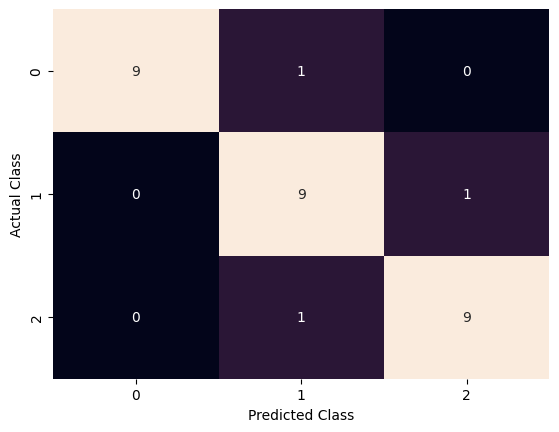

In [ ]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot=True, cbar=False)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()